# Key recovery attack on GGH-style signature scheme

**What's next**:
High level analysis:

1. Use the samples to compute an estimate of the covariance matrix
2. Use the Cholesky decomposition to convert samples from the parallelepiped to the hypercube
3. Use gradient descent to learn the basis of hypercube
4. Convert the hypercube back to the parallelepiped
5. Verify that the basis is indeed leaked

Constraints:
- Use `numpy` where possible. Use `sympy` where specific computation is needed, such as HNF and Cholesky
- Use `float` as the default and check for integer using a tunable threshold

ortho-defect of sk is 1.2113881434637062
ortho-defect of pk is 15989.000031271491
Generated 10000 message-signature pairs in 4.93 seconds


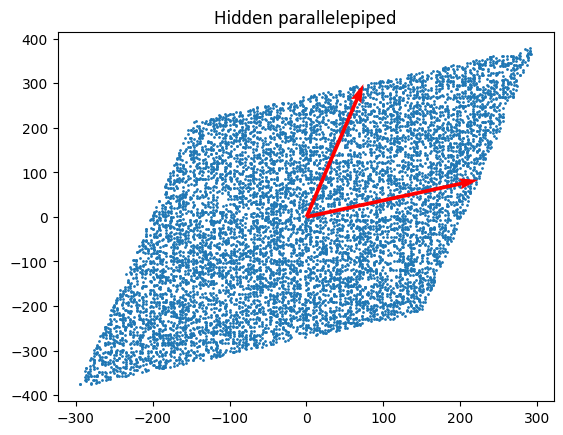

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import Matrix
from ggh.signature import keygen, sign, verify
from ggh.arithmetic import ortho_defect
from ggh.attack import generate_pairs, leak_covariance

np.random.seed(4)

n = 2

pk, sk, radius = keygen(n)

print(f"ortho-defect of sk is {ortho_defect(sk)}")
print(f"ortho-defect of pk is {ortho_defect(pk)}")


sample_size = 10000
samples = generate_pairs(pk, sk, radius, n, sample_size)
diffs = np.array([2 * (message - sigma) for (message, sigma) in samples])

# Plot samples of the hidden parallele piped and the secret basis
fig, ax = plt.subplots()
ax.scatter(diffs[:, 0], diffs[: ,1], s=1)
# ax.set_xlim(-150, 350)
# ax.set_ylim(-150, 350)
plt.title("Hidden parallelepiped")

# Plot the secret basis
ax.quiver(
    0, 0,
    sk[0][0], sk[1][0], 
    angles='xy', scale_units='xy', scale=1, color='red', label='Vector'
)
ax.quiver(
    0, 0,
    sk[0][1], sk[1][1], 
    angles='xy', scale_units='xy', scale=1, color='red', label='Vector'
)

# Show the plot
plt.show()

(10000, 2)


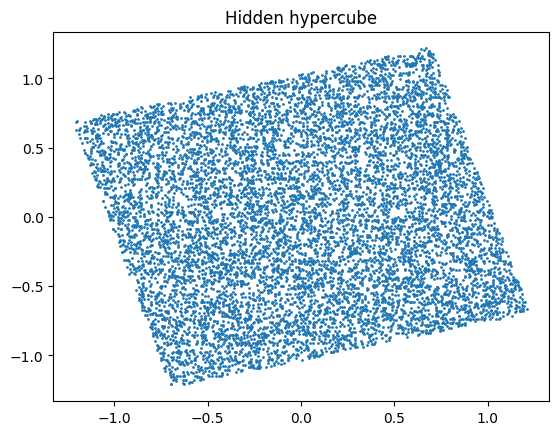

In [3]:
approx_covariance =  diffs.transpose().dot(diffs) * 3 / diffs.shape[0]
true_covariance = sk.transpose().dot(sk)
# print(approx_covariance)
# print(true_covariance)

inverse_cov = Matrix(approx_covariance).inv()
cholesky = np.array(inverse_cov.cholesky(hermitian=False))
# print(cholesky)

hypercube_samples = diffs.dot(cholesky)
print(hypercube_samples.shape)

fig, ax = plt.subplots()
ax.scatter(hypercube_samples[:, 0], hypercube_samples[: ,1], s=1)
plt.title("Hidden hypercube")
plt.show()

In [17]:
# Compute the fourth moment
w = np.array([0, 1])
print((diffs.dot(w) ** 4).mean())

2012057790.1856
2012057790.1856
